In [1]:
# Importing all the neccessary libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the DataFrame
df = pd.read_csv("diamonds.csv")

In [3]:
# Checking the Head of the DataFrame
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Dimensions of the DataFrame
df.shape

(53940, 10)

In [5]:
# Checking the Basic Info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
# Checking the Description of the DataFrame
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Checking for the Null_columns in the DataFrame
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
# Separating the Numerical Columns
num_cols = [c for c in df.columns if c in df.select_dtypes(exclude="O")]
# Separationg the Categorical Columns
cat_cols = [c for c in df.columns if c not in num_cols]
# Checking the DataFrame with Numerical Columns
df[num_cols]


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
# Separating the Numerical Columns
num_cols = [c for c in df.columns if c in df.select_dtypes(exclude="O")]
# Separationg the Categorical Columns
cat_cols = [c for c in df.columns if c not in num_cols]
# Checking the DataFrame with Numerical Columns
df[num_cols]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
# Checking The DataFrame with Categorical DataFrame
df[cat_cols]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


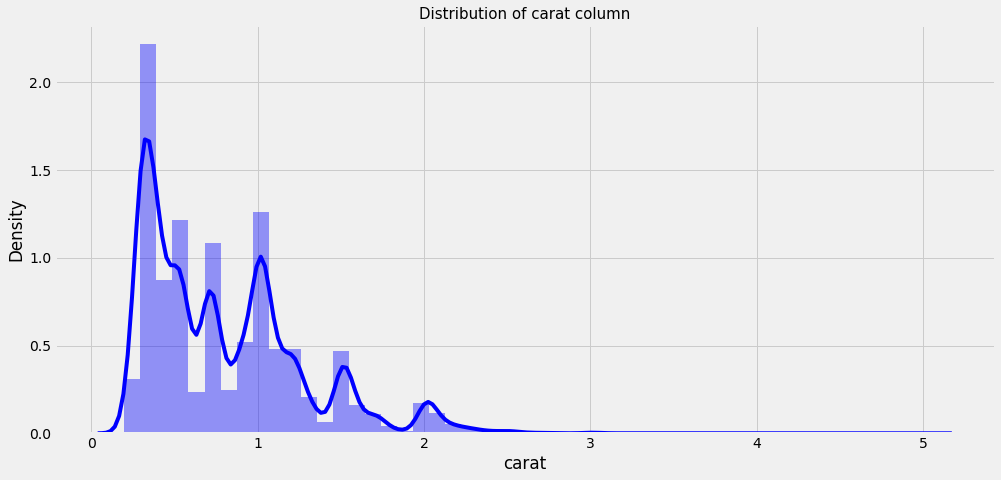

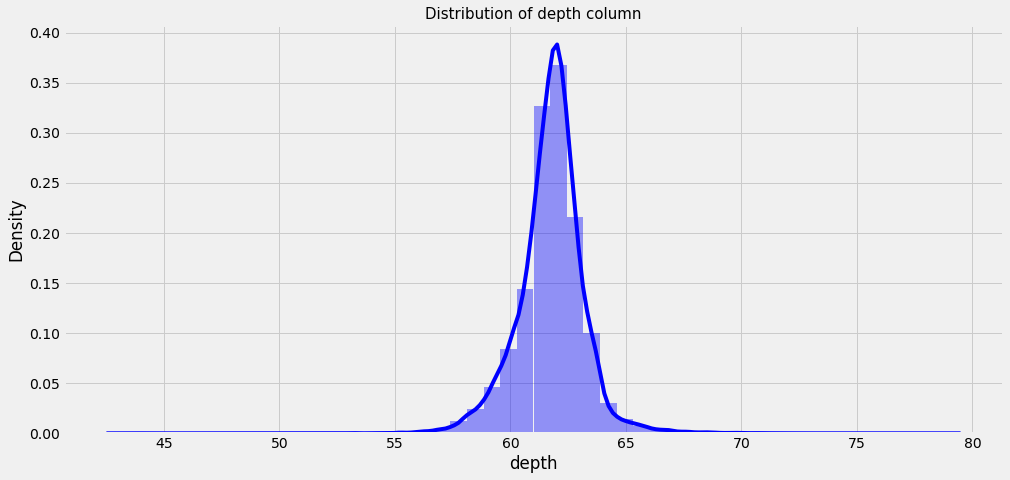

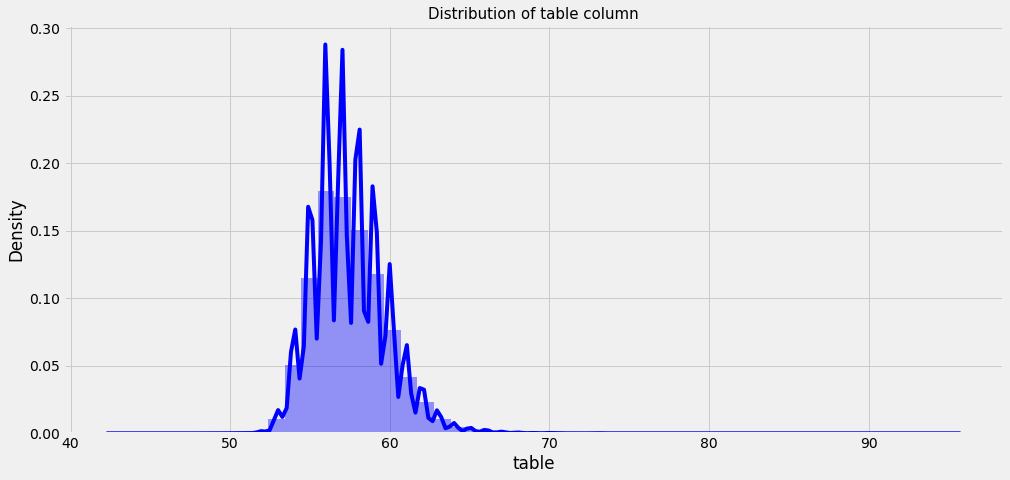

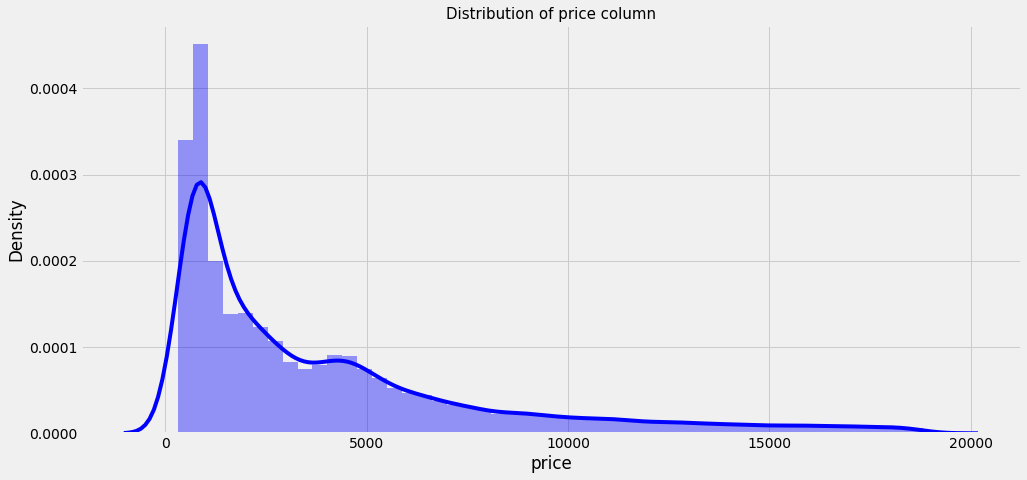

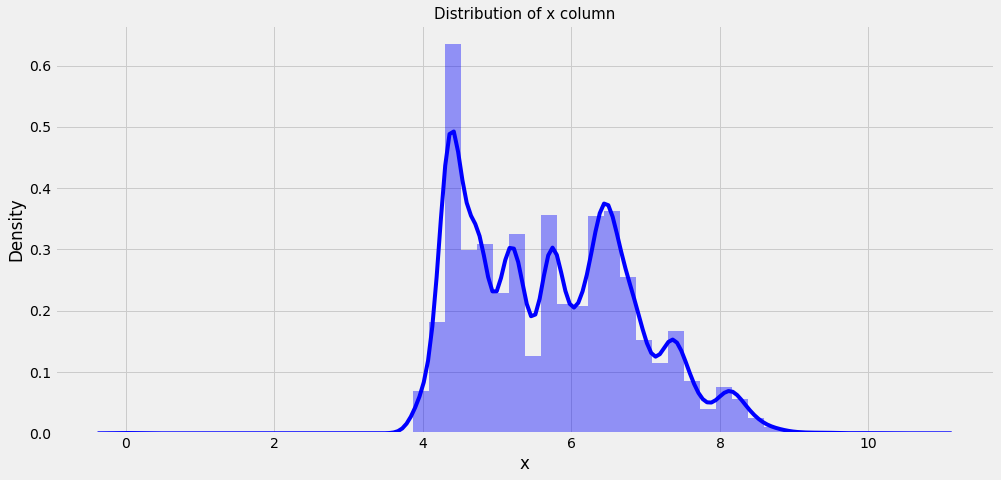

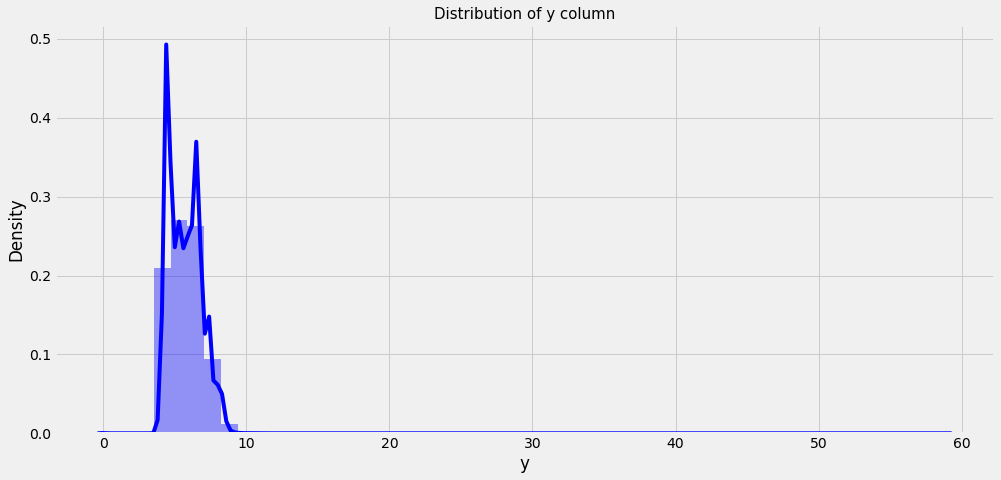

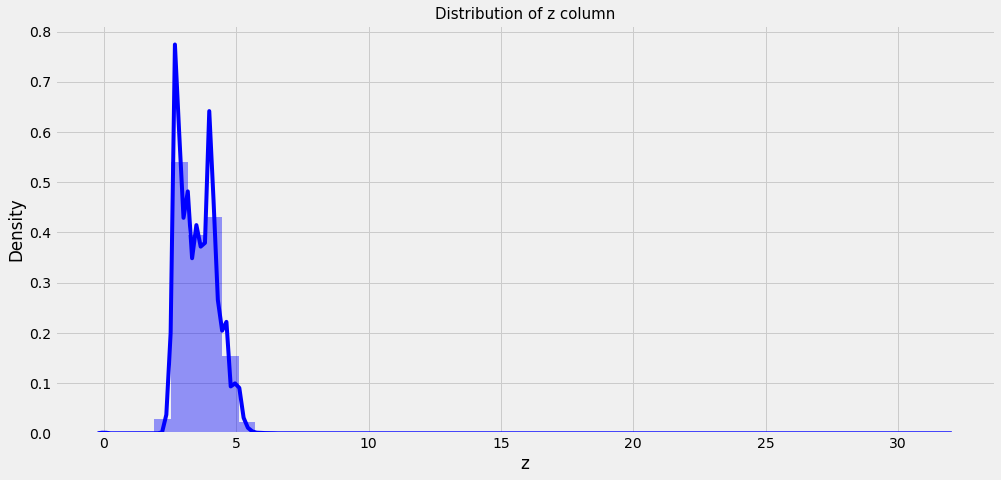

In [11]:
# Plotting the Histograms for the Numerical Columns
plt.style.use("fivethirtyeight")
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.distplot(df[col],color='blue')
    plt.title(f"Distribution of {col} column",fontsize=15)
    plt.show()

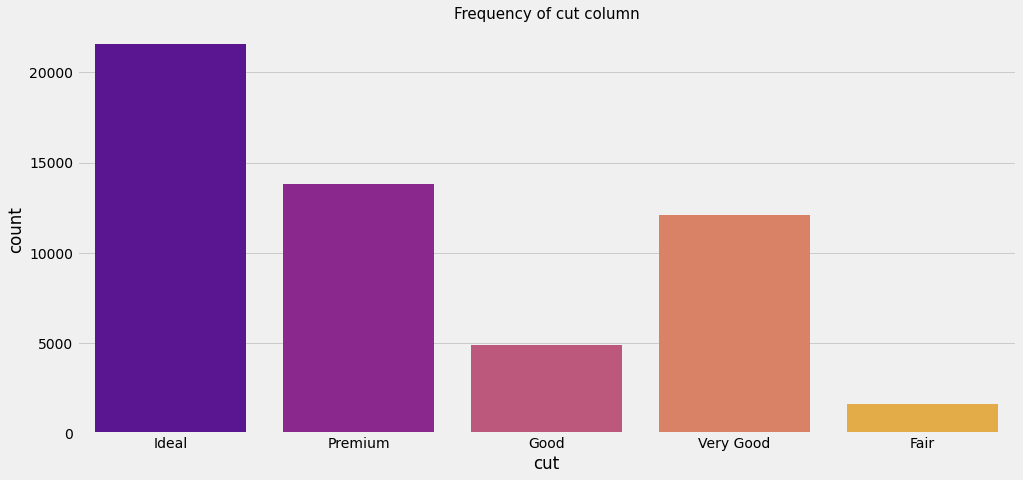

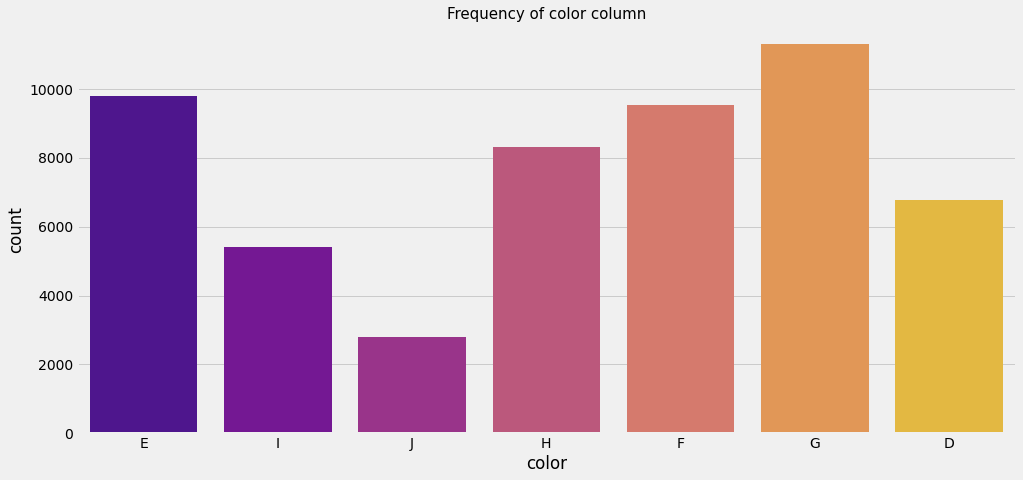

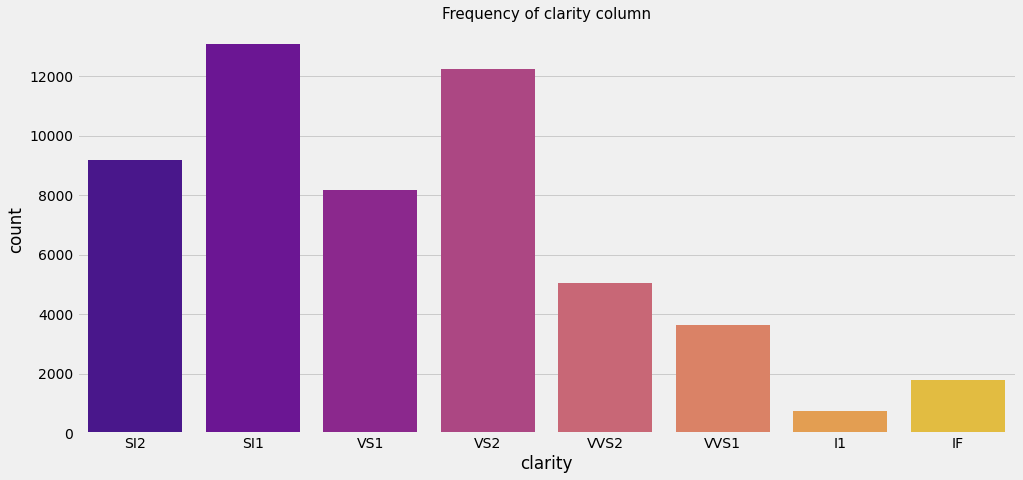

In [12]:
# Plotting the Frequencies of the Categorical Columns
plt.style.use("fivethirtyeight")
for col in cat_cols:
    plt.figure(figsize=(15,7))
    sns.countplot(df[col],palette="plasma")
    plt.title(f"Frequency of {col} column",fontsize=15)
    plt.show()

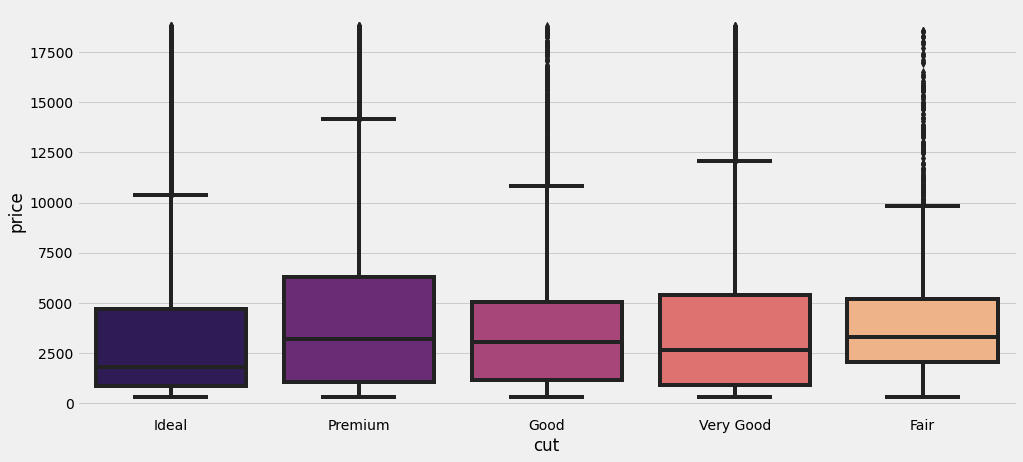

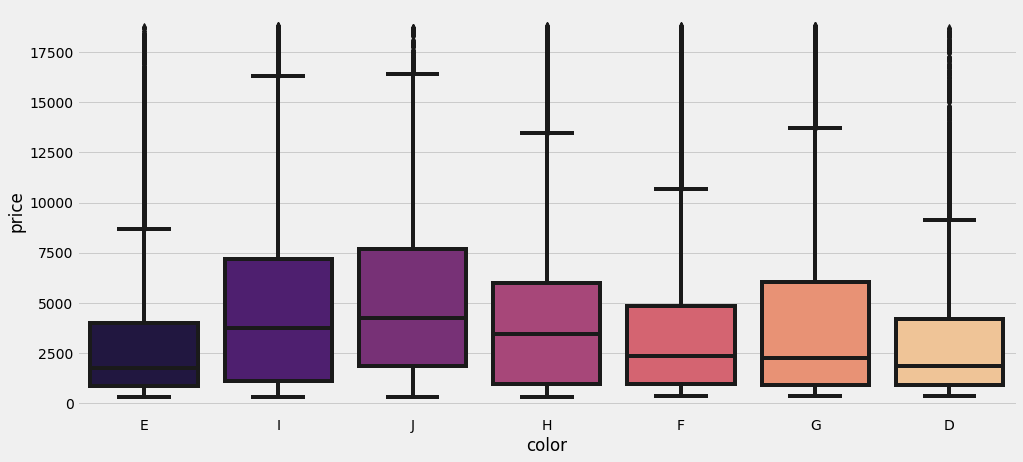

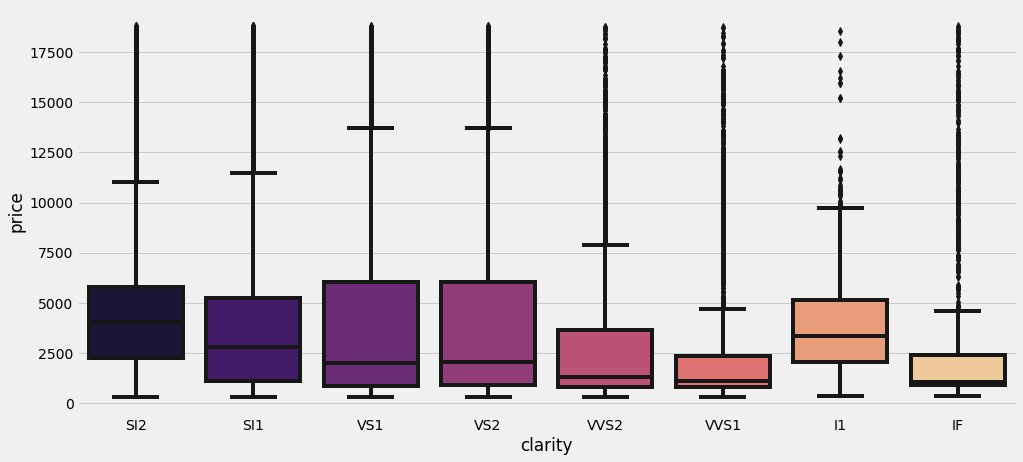

In [13]:
# Plotting the Price Distribution wrt to Categorical Columns
for col in cat_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(df[col],df['price'],palette='magma')
    plt.show()

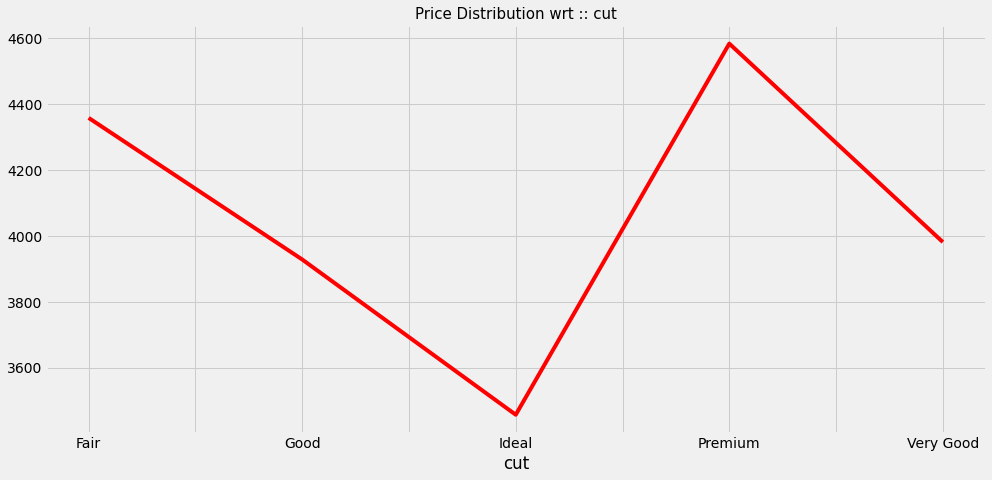

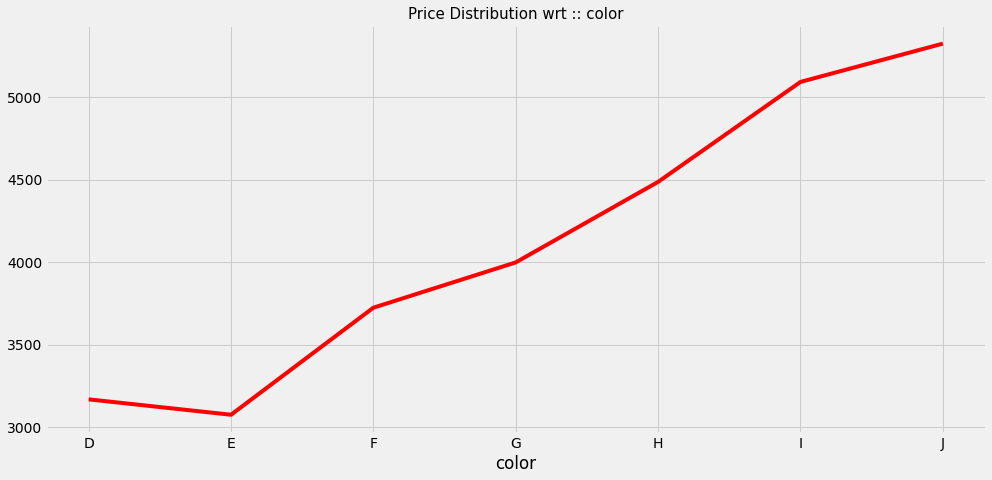

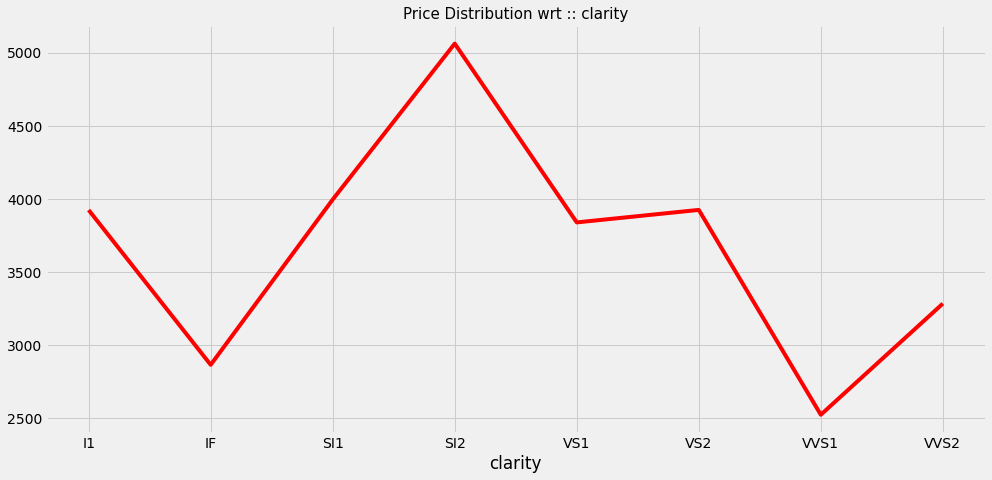

In [14]:
# Plotting a line plot for the Price Distribution
for col in cat_cols:
    plt.figure(figsize=(15,7))
    df.groupby(col)['price'].mean().plot(color='red')
    plt.title(f"Price Distribution wrt :: {col}",fontsize=15)
    plt.show()

In [15]:
# One hot Encoding for Categorical Columns 
df = pd.get_dummies(df,columns=cat_cols)


In [16]:
# Looking at the DataFrame after Encoding
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [17]:
# Makinga marker for plotting the Outliers Clearly.
marker = dict(markerfacecolor='yellow',markeredgecolor='red',markersize=15,marker='o')

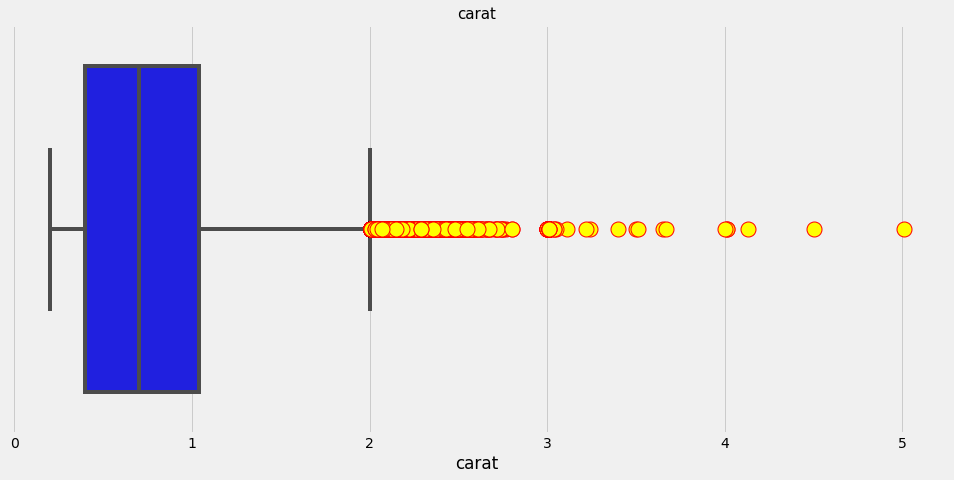

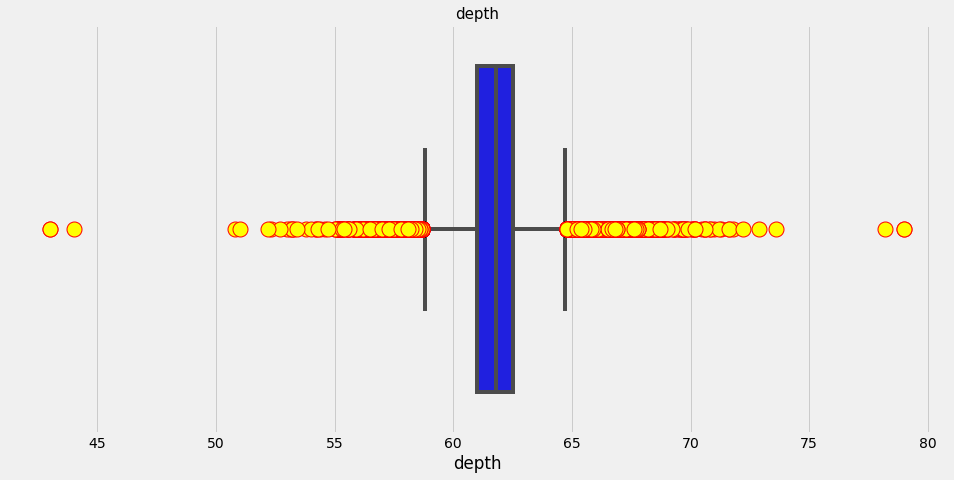

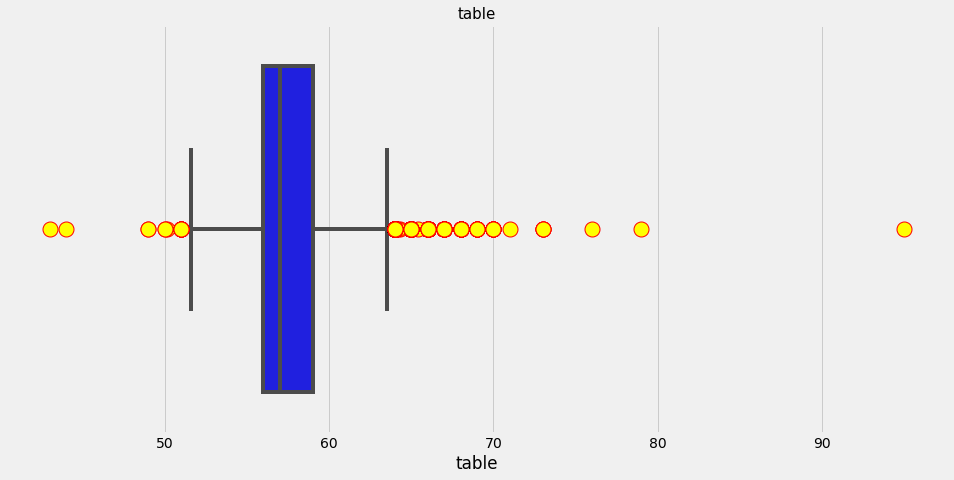

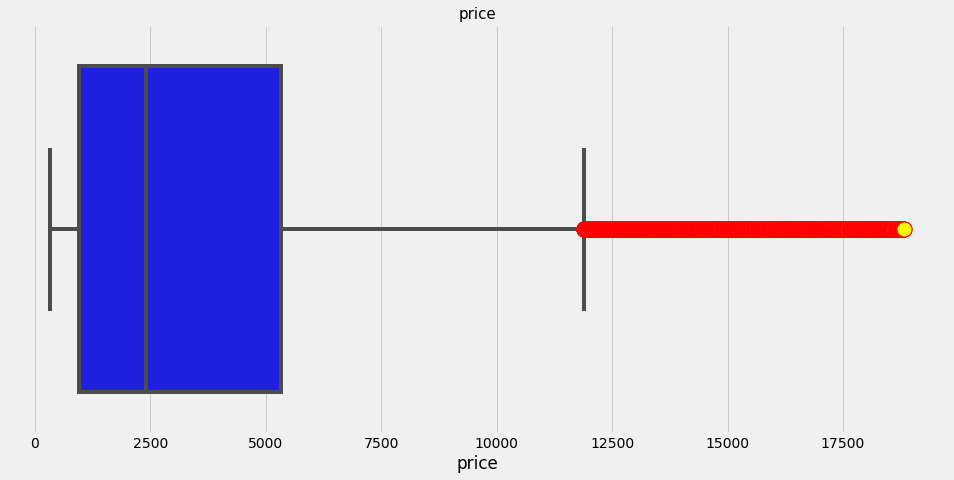

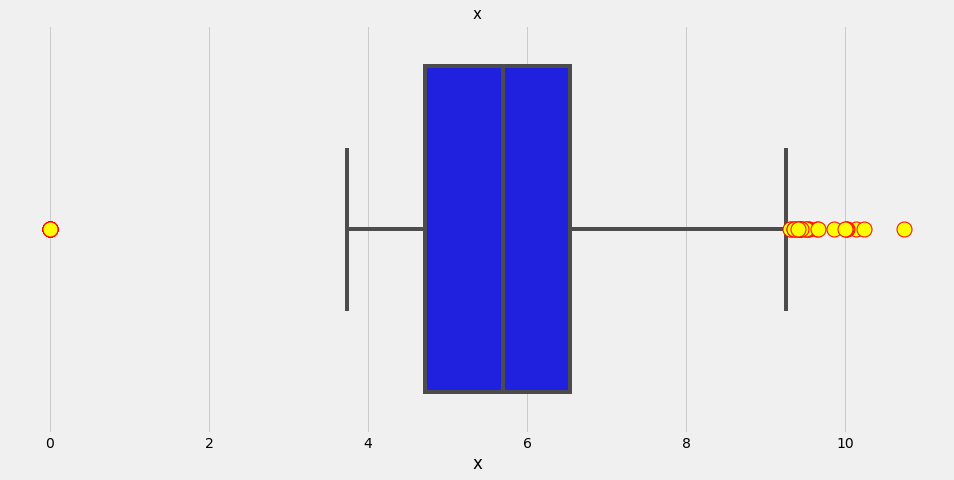

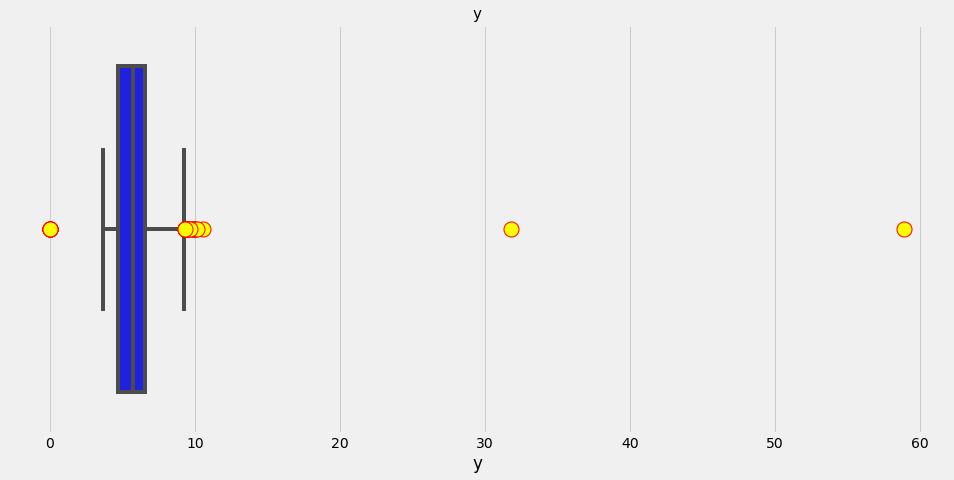

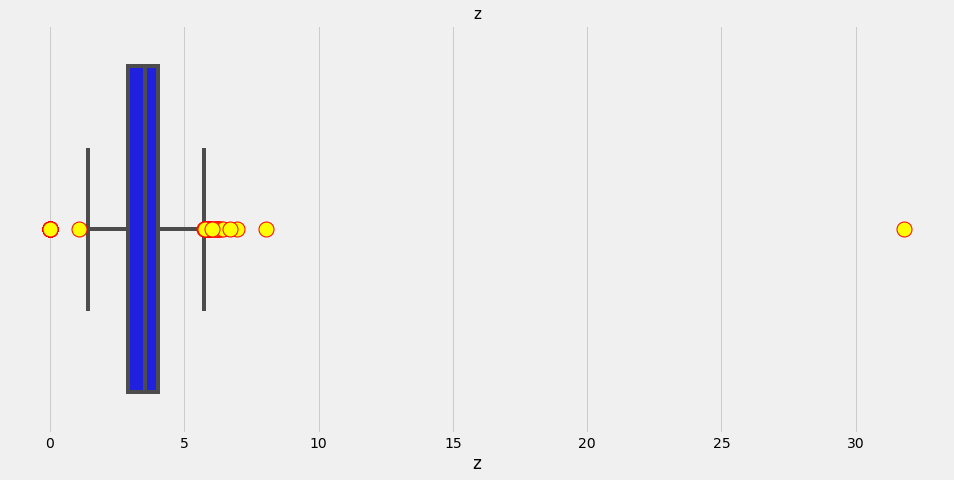

In [18]:
# Checking for the Outliers in numerical_columns:
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(df[col],color="blue",flierprops=marker)
    plt.title(col,fontsize=15)
    plt.show()

In [19]:
# Let's try to remove the Outliers in the numerical columns
def remove_outliers(data,columns):
    for column in columns:
        iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
        lower_boundary = data[column].mean() - (1.5 * iqr)
        upper_boundary = data[column].mean() + (1.5 * iqr)

        data = data[(data[column] >= lower_boundary) & (data[column] <= upper_boundary)]
    return data

In [20]:
# Removing Price column from the numerical columns
num_cols.remove('price')

In [21]:
# making a copy of Original DataFrame 
x = df.copy()

In [22]:
# Assigning the Filtered Dataframe to a new Variable called "new_df"
new_df = remove_outliers(x,num_cols)

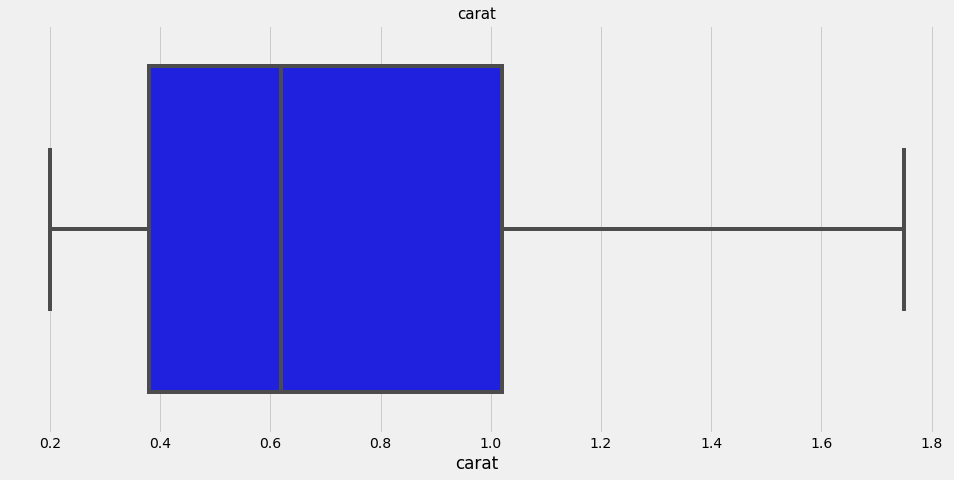

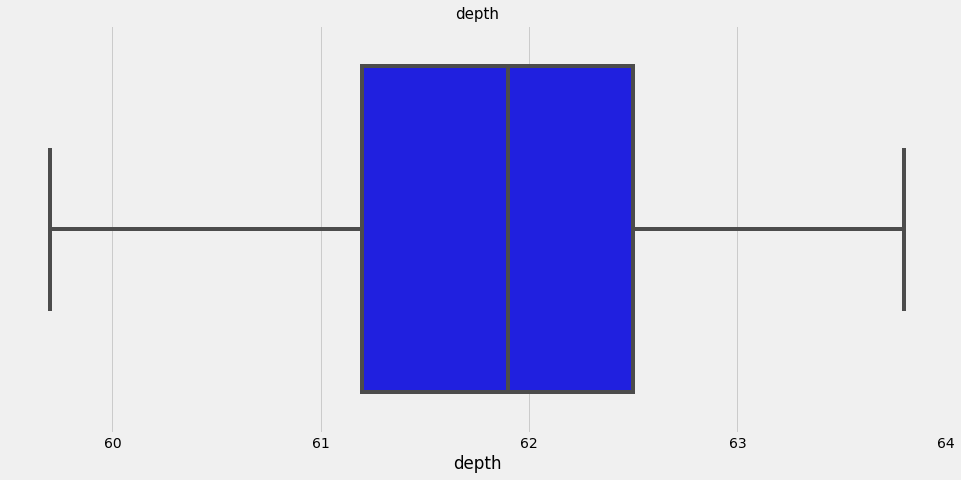

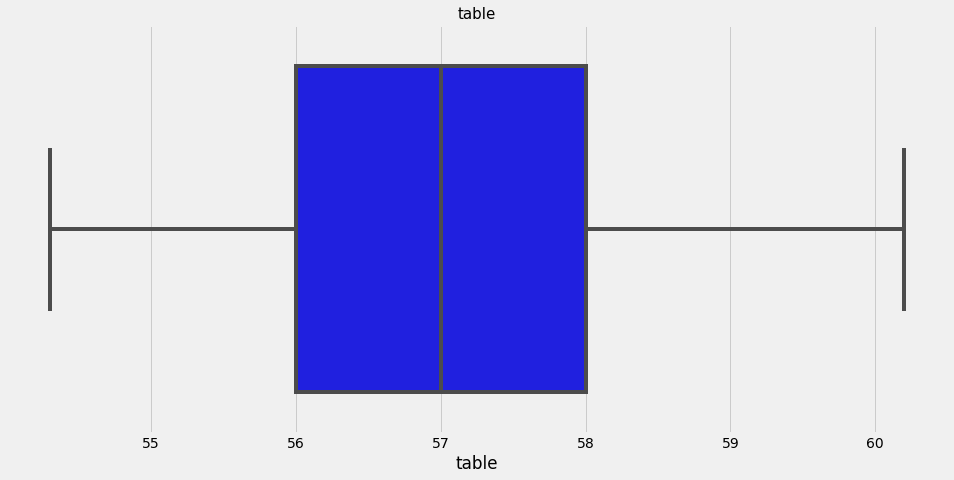

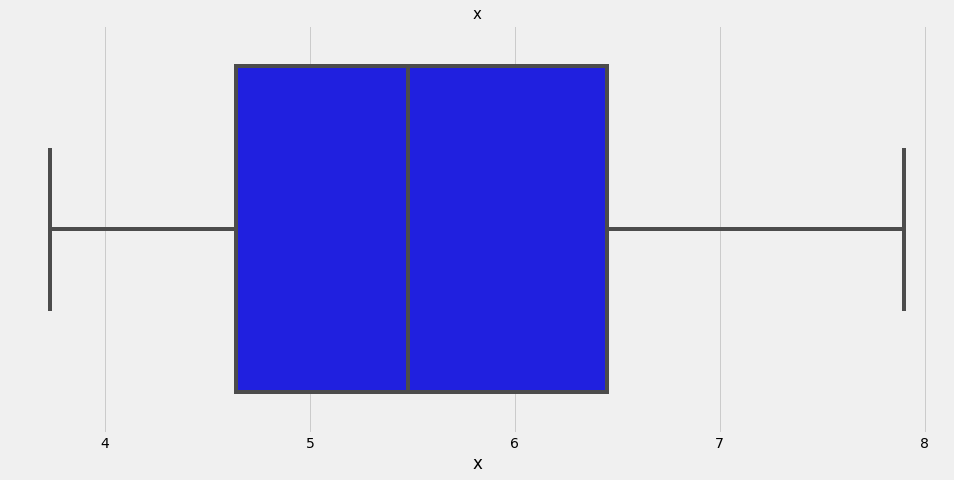

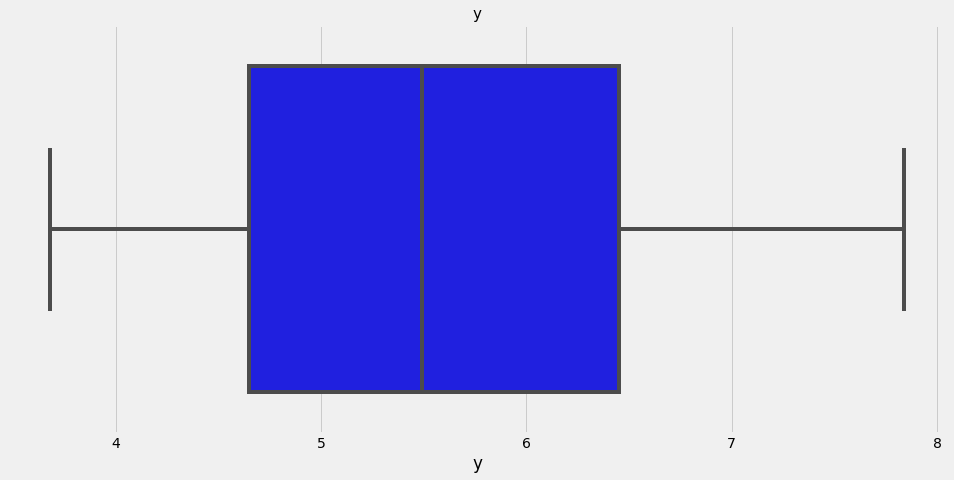

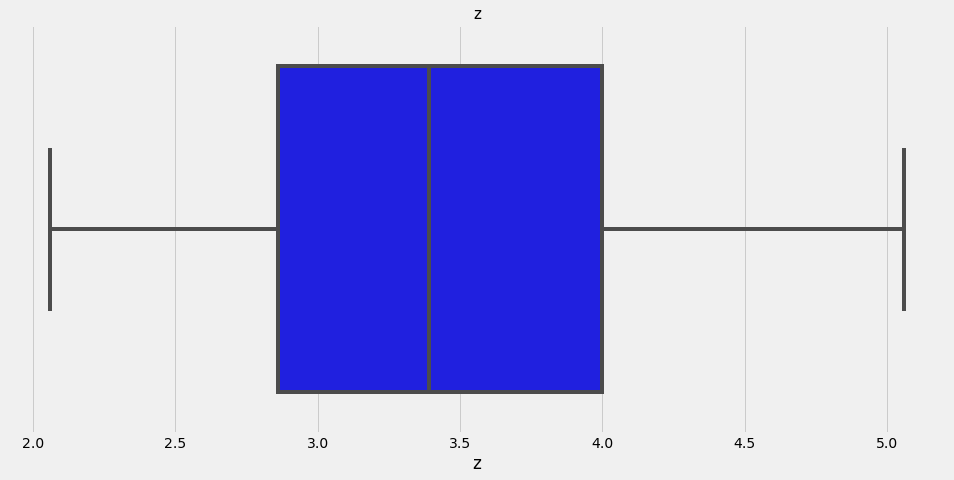

In [23]:
# Checking for the Outliers in numerical_columns:
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(new_df[col],color="blue",flierprops=marker)
    plt.title(col,fontsize=15)
    plt.show()

In [24]:
df= new_df.copy()
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,0.24,62.3,57.0,336,3.95,3.98,2.47,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [25]:
# Separating the Dependent and Independent Features
X = df.drop('price',axis=1)
y = df['price']

In [26]:
# Splitting the Data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [27]:
# Scaling the Data
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [28]:
# K-Nearest Neighbors Regressor from SKLEARn
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
sk_preds = knn.predict(X_test)
print(mean_squared_error(y_test,sk_preds))
print(r2_score(y_test,sk_preds))

379412.49481943465
0.965075845027099


In [29]:
# The Custom KNN Regressor
class custom_KNNR():

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X_test,n_neighbors):
        
        self.X_train = X_train
        self.y_train = y_train
        y_pred = np.zeros(y_test.shape)
        self.n_neighbors = n_neighbors
        
        for i in range(len(X_test)):

            euc_dist = np.sqrt(np.sum((X_train - X_test.iloc[i]) ** 2 ,axis=1))
            y_pred[i] = y_train.iloc[np.argsort(euc_dist,axis=0)[:n_neighbors]].mean()
            if i % 1000 == 0 :
                print(f"Successfully Completed {i} Records...")
        print("Model Predictions Completed .. ")
        return y_pred
    

In [30]:
# Creatinga an Object for the Custom KNN Class
knn = custom_KNNR()

In [31]:
# Fitting the Training Data into The Custom Function
knn.fit(X_train,y_train)

In [ ]:
# Making the Predictions using 5 Nearest Neighbors
preds = knn.predict(X_test,n_neighbors=5)

Successfully Completed 0 Records...
Successfully Completed 1000 Records...
Successfully Completed 2000 Records...


In [ ]:
# Calculating the Mean Squared Error
mean_squared_error(y_test,preds)

In [ ]:
# Calculating the R-Squared Score
r2_score(y_test,preds)

In [ ]:
# Plotting the Results with the Original Values
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds, c='red')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(preds), max(y_test))
p2 = min(min(preds), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Comparing the Predictions with the Original Values",fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
# Finding the Predictions with Different K-Values.
predictions = []
r2_scores = []
for i in range(5,16,2):
    print(i)
    knn = custom_KNNR()
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test,n_neighbors=i)
    predictions.append(preds)
    r2 = r2_score(y_test,preds)
    r2_scores.append(r2)
    print(r2)

In [ ]:
# Plotting the R2-Score for the Comparision with Different K-Values
plt.figure(figsize=(14,10),)
plt.plot(range(5,16,2),r2_scores,color='black',linestyle='dashed',marker='o',
        markerfacecolor='violet',markersize=10)
plt.title("R2_score VS K_value")
plt.xlabel('K')
plt.ylabel('Error_rate')

In [ ]:
# Comparing the Different Predictions from Different K-Values with the Original Values.
for pred in predictions:
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, pred, c='red')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(preds), max(y_test))
    p2 = min(min(preds), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()